In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import FactorAnalysis
from scipy import stats
%matplotlib inline

In [83]:
data = pd.read_csv('Graduation_Outcomes_large.csv', sep=',')
data.head()

,Demographic,DBN,School Name,Cohort,Total Cohort,Total Grads - n,Total Grads - % of cohort,Total Regents - n,Total Regents - % of cohort,Total Regents - % of grads,...,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort
0,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2003,5,s,s,s,s,s,...,s,s,s,s,s,s,s,s,s,s
1,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2004,55,37,67.3%,17,30.9%,45.9%,...,17,30.9%,45.9%,20,36.4%,54.1%,15,27.3%,3,5.5%
2,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2005,64,43,67.2%,27,42.2%,62.8%,...,27,42.2%,62.8%,16,25%,37.200000000000003%,9,14.1%,9,14.1%
3,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2006,78,43,55.1%,36,46.2%,83.7%,...,36,46.2%,83.7%,7,9%,16.3%,16,20.5%,11,14.1%
4,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2006 Aug,78,44,56.4%,37,47.4%,84.1%,...,37,47.4%,84.1%,7,9%,15.9%,15,19.2%,11,14.1%


In [84]:
data = data[~(data['Total Grads - n'].apply(str) == 's')]
data = data[~(data['Total Regents - % of grads'].apply(str) == '.')]

In [85]:
data.head()

,Demographic,DBN,School Name,Cohort,Total Cohort,Total Grads - n,Total Grads - % of cohort,Total Regents - n,Total Regents - % of cohort,Total Regents - % of grads,...,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort
1,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2004,55,37,67.3%,17,30.9%,45.9%,...,17,30.9%,45.9%,20,36.4%,54.1%,15,27.3%,3,5.5%
2,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2005,64,43,67.2%,27,42.2%,62.8%,...,27,42.2%,62.8%,16,25%,37.200000000000003%,9,14.1%,9,14.1%
3,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2006,78,43,55.1%,36,46.2%,83.7%,...,36,46.2%,83.7%,7,9%,16.3%,16,20.5%,11,14.1%
4,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2006 Aug,78,44,56.4%,37,47.4%,84.1%,...,37,47.4%,84.1%,7,9%,15.9%,15,19.2%,11,14.1%
5,Total Cohort,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,2001,64,46,71.900000000000006%,32,50%,69.599999999999994%,...,25,39.1%,54.3%,14,21.9%,30.4%,10,15.6%,6,9.4%


In [86]:
data['Total Grads - % of cohort'] = data['Total Grads - % of cohort'].apply(str).map(lambda x: x.strip('%')).astype('float64')
data['Total Regents - % of cohort'] = data['Total Regents - % of cohort'].apply(str).map(lambda x: x.strip('%')).astype('float64')
data['Total Regents - % of grads'] = data['Total Regents - % of grads'].apply(str).map(lambda x: x.strip('%')).astype('float64')
data['Advanced Regents - % of cohort'] = data['Advanced Regents - % of cohort'].apply(str).map(lambda x: x.strip('%')).astype('float64')
data['Regents w/o Advanced - % of grads'] = data['Regents w/o Advanced - % of grads'].apply(str).map(lambda x: x.strip('%')).astype('float64')
data['Local - % of cohort'] = data['Local - % of cohort'].apply(str).map(lambda x: x.strip('%')).astype('float64')
data['Local - % of grads'] = data['Local - % of grads'].apply(str).map(lambda x: x.strip('%')).astype('float64')
data['Still Enrolled - % of cohort'] = data['Still Enrolled - % of cohort'].apply(str).map(lambda x: x.strip('%')).astype('float64')
data['Dropped Out - % of cohort'] = data['Dropped Out - % of cohort'].apply(str).map(lambda x: x.strip('%')).astype('float64')
data['Regents w/o Advanced - % of cohort'] = data['Regents w/o Advanced - % of cohort'].apply(str).map(lambda x: x.strip('%')).astype('float64')
data['Advanced Regents - % of grads'] = data['Advanced Regents - % of grads'].apply(str).map(lambda x: x.strip('%')).astype('float64')

data['Total Grads - n'] = data['Total Grads - n'].astype('int64')
data['Total Regents - n'] = data['Total Regents - n'].astype('int64')
data['Advanced Regents - n'] = data['Advanced Regents - n'].astype('float64').astype('int64')
data['Dropped Out - n'] = data['Dropped Out - n'].astype('float64').astype('int64')
data['Still Enrolled - n'] = data['Still Enrolled - n'].astype('float64').astype('int64')
data['Regents w/o Advanced - n'] = data['Regents w/o Advanced - n'].astype('float64').astype('int64')
data['Local - n'] = data['Local - n'].astype('int64')

# Firs two features to categorial if it is necessary

In [87]:
data.dropna(inplace=True)

In [88]:
data.dtypes

Demographic                            object
DBN                                    object
School Name                            object
Cohort                                 object
Total Cohort                            int64
Total Grads - n                         int64
Total Grads - % of cohort             float64
Total Regents - n                       int64
Total Regents - % of cohort           float64
Total Regents - % of grads            float64
Advanced Regents - n                    int64
Advanced Regents - % of cohort        float64
Advanced Regents - % of grads         float64
Regents w/o Advanced - n                int64
Regents w/o Advanced - % of cohort    float64
Regents w/o Advanced - % of grads     float64
Local - n                               int64
Local - % of cohort                   float64
Local - % of grads                    float64
Still Enrolled - n                      int64
Still Enrolled - % of cohort          float64
Dropped Out - n                   

In [89]:
number_data = data.drop(['Demographic', 'DBN', 'School Name', 'Cohort'], axis=1)

In [90]:
number_data.head()

,Total Cohort,Total Grads - n,Total Grads - % of cohort,Total Regents - n,Total Regents - % of cohort,Total Regents - % of grads,Advanced Regents - n,Advanced Regents - % of cohort,Advanced Regents - % of grads,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort
1,55,37,67.3,17,30.9,45.9,0,0.0,0.0,17,30.9,45.9,20,36.4,54.1,15,27.3,3,5.5
2,64,43,67.2,27,42.2,62.8,0,0.0,0.0,27,42.2,62.8,16,25.0,37.2,9,14.1,9,14.1
3,78,43,55.1,36,46.2,83.7,0,0.0,0.0,36,46.2,83.7,7,9.0,16.3,16,20.5,11,14.1
4,78,44,56.4,37,47.4,84.1,0,0.0,0.0,37,47.4,84.1,7,9.0,15.9,15,19.2,11,14.1
5,64,46,71.9,32,50.0,69.6,7,10.9,15.2,25,39.1,54.3,14,21.9,30.4,10,15.6,6,9.4


In [91]:
normalized_data = StandardScaler().fit_transform(number_data)

In [92]:
# number_data.to_csv('nschool_data.csv', index=False)
# pd.DataFrame(StandardScaler().fit_transform(number_data)).to_csv('normalized_school_data.csv', index=False)

### Calculate principal components using spectral (eigenvalue) decomposition and singular value decomposition.

In [93]:
number_of_features = number_data.columns.size

In [94]:
mean_vec = np.mean(normalized_data, axis=0)
cov_mat = (normalized_data - mean_vec).T.dot((normalized_data - mean_vec)) / (normalized_data.shape[0]-1)
# cov_mat = np.cov(X_std.T)

In [132]:
pd.DataFrame(eig_vecs).to_csv('eig_vecs.csv')

In [95]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

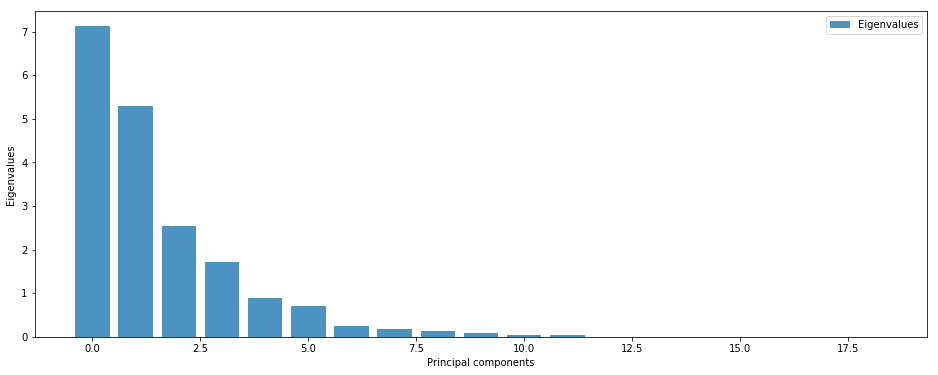

In [96]:
# variance = cov_mat.diagonal()
plt.figure(figsize=(16, 6))
plt.bar(range(number_of_features), eig_vals, alpha=0.8, align='center', label='Eigenvalues')
plt.ylabel('Eigenvalues ')
plt.xlabel('Principal components')
plt.legend(loc='best');
# plt.savefig('file.png')

In [133]:
U, s, V = np.linalg.svd(normalized_data)

In [143]:
pd.DataFrame(U[:19, :19].dot(np.diag(s)))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,-1.570388,0.697286,0.000168,1.482484,-0.669451,-0.171816,-0.283025,-0.041892,0.209226,-0.085792,0.094425,0.042166,-0.002726,0.000569,0.000260,-0.000006,1.584400e-05,1.117002e-06,1.631165e-14
1,-0.589961,1.157336,-0.875014,0.782139,0.286356,0.566619,-0.212458,0.014864,0.003323,0.086697,-0.035747,0.059230,0.001393,0.001285,0.000154,0.000003,6.621526e-06,5.259458e-06,-2.962203e-15
2,0.154792,1.495658,-1.758251,-0.792617,0.090948,0.582981,-0.241594,-0.167249,-0.059188,0.048484,-0.276176,0.105983,-0.000293,-0.000358,-0.002919,-0.000014,-4.568581e-05,-4.256007e-04,-6.835813e-16
3,0.232036,1.545775,-1.790799,-0.734872,0.130273,0.608489,-0.228518,-0.141547,-0.065179,0.051742,-0.277470,0.101432,-0.000170,0.000556,-0.000060,0.000010,-3.722349e-07,-5.482365e-06,-3.428264e-15
4,0.116508,1.379165,-0.111588,0.530784,0.208817,0.029767,-0.109745,-0.045574,0.052564,0.036756,0.007860,-0.059017,-0.000065,0.001913,-0.000222,-0.000209,2.386111e-03,4.335010e-07,-3.707360e-16
5,-0.788624,0.872805,1.174301,0.475322,-0.601851,-0.786026,-0.076613,-0.262877,0.261746,-0.149178,-0.034258,-0.206880,-0.001045,0.001575,0.001218,0.002356,2.619446e-03,4.228535e-04,5.263531e-16
6,-0.226919,0.668643,0.427764,1.448935,0.609207,0.135428,-0.120283,-0.186002,0.045723,0.063641,0.144669,-0.014233,0.003387,0.001364,0.000329,-0.000003,1.249299e-05,-2.751028e-05,-1.625355e-14
7,-1.055604,-0.015522,0.253569,1.460874,-0.728442,-0.665784,-0.162607,-0.277714,-0.077955,0.040729,0.100875,-0.026697,0.007547,0.000575,0.001708,0.002568,2.345141e-04,4.423112e-04,-1.111968e-17
8,-1.146221,-0.137153,-0.193428,0.228631,-0.538070,-0.351334,-0.123347,-0.225126,-0.042771,0.072619,-0.032585,-0.004965,-0.001530,0.000431,0.000112,0.000005,4.111400e-06,-2.263926e-05,-2.859087e-17
9,-0.338493,0.215487,-0.701472,-1.600456,-0.028629,-0.016139,-0.246006,-0.404891,0.194816,0.109770,0.013551,-0.084395,-0.002658,-0.001710,-0.002371,0.000184,-2.388584e-03,-4.957123e-04,-1.800069e-18


In [138]:
matrix_w = np.hstack(eig.reshape(19,1) for eig in eig_vecs)

In [145]:
pd.DataFrame(normalized_data.dot(matrix_w));

In [112]:
n_components = 6
pca = PCA(n_components=n_components)
X_reduced = pca.fit_transform(normalized_data)
principalDf = pd.DataFrame(data = X_reduced)
# principalDf

# pca.score_samples(normalized_data.T)

# s * s / (number_of_features - 1)

#### Factor analysis

In [102]:
fa = FactorAnalysis(n_components=6)

In [103]:
fa.fit_transform(normalized_data)

D:\Programs\Anaconda3\lib\site-packages\sklearn\decomposition\factor_analysis.py:228: ConvergenceWarning: FactorAnalysis did not converge. You might want to increase the number of iterations.
  ConvergenceWarning)


array([[ 0.62621604, -0.4744101 , -0.27926601,  0.54258588, -0.83725916,
        -0.64197019],
       [-0.03000653, -0.82562579, -0.23308642,  0.39003125, -0.46647049,
         0.64581138],
       [-0.8414052 , -1.25992199, -0.1651421 ,  0.03207159,  0.65505194,
         0.52743071],
       ..., 
       [ 1.11552605, -0.20945566, -0.1638124 , -0.20541449,  2.36548565,
         0.77031892],
       [ 0.46817253, -0.56150157, -0.28927157, -0.20371901,  2.63223789,
         0.34970985],
       [ 0.46817253, -0.56150157, -0.28927157, -0.20371901,  2.63223789,
         0.34970985]])

In [104]:
fa.noise_variance_

array([  9.70842945e-06,   7.52334214e-03,   7.74302937e-04,
         4.90492841e-05,   5.10467568e-02,   4.57971513e-07,
         1.04424282e-01,   4.15453766e-02,   1.33875560e-06,
         1.62755883e-01,   8.14611408e-02,   1.05305809e-06,
         1.37070851e-01,   2.12449358e-01,   3.56727419e-04,
         5.02965961e-02,   5.00714752e-02,   8.14974282e-02,
         7.17475274e-02])

In [108]:
pd.DataFrame(fa.components_, columns=number_data.columns)

,Total Cohort,Total Grads - n,Total Grads - % of cohort,Total Regents - n,Total Regents - % of cohort,Total Regents - % of grads,Advanced Regents - n,Advanced Regents - % of cohort,Advanced Regents - % of grads,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort
0,-0.146118,-0.271297,-0.596499,-0.360151,-0.848798,-0.997390,-0.276799,-0.457264,-0.472978,-0.346235,-0.695421,-0.693453,0.188269,0.670848,0.997225,0.093995,0.483687,0.082147,0.429962
1,0.273541,0.354875,0.222269,0.389347,0.256575,0.071587,0.574717,0.855796,0.880558,0.030380,-0.489240,-0.720304,0.058762,-0.128471,-0.071404,0.069955,-0.206303,0.061163,-0.126818
2,0.948890,0.855715,-0.112519,0.765480,-0.092661,-0.009308,0.512484,-0.079791,-0.030099,0.830581,-0.046808,0.016861,0.788107,-0.010520,0.009252,0.806483,0.068921,0.764330,0.152757
3,-0.058166,0.242271,0.309622,0.362701,0.203416,-0.000821,0.456271,0.080886,-0.001444,0.127070,0.194629,0.000387,-0.321404,0.133776,0.000842,-0.493801,-0.238436,-0.511892,-0.283571
4,-0.006335,-0.044471,-0.696763,0.033759,-0.335314,0.000150,0.133268,-0.057961,0.000165,-0.101533,-0.394315,0.000025,-0.315122,-0.549663,0.000150,0.081356,0.628631,0.010595,0.411709
5,-0.000032,0.004220,-0.002414,0.000130,-0.016295,0.000004,-0.008662,-0.026643,-0.000003,0.011065,0.004058,-0.000003,0.017776,0.029538,0.001066,-0.187354,-0.465441,0.248329,0.673833


In [109]:
pd.DataFrame(pca.components_, columns=number_data.columns)

,Total Cohort,Total Grads - n,Total Grads - % of cohort,Total Regents - n,Total Regents - % of cohort,Total Regents - % of grads,Advanced Regents - n,Advanced Regents - % of cohort,Advanced Regents - % of grads,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort
0,0.202405,0.264293,0.270096,0.287942,0.327371,0.311908,0.253130,0.259964,0.261546,0.237080,0.186723,0.113492,0.051239,-0.187993,-0.311877,0.044925,-0.228660,0.043451,-0.182811
1,0.361878,0.286973,-0.190610,0.234680,-0.195240,-0.160419,0.167011,-0.039180,-0.008583,0.242285,-0.224297,-0.172935,0.346505,0.059981,0.160428,0.366534,0.141383,0.355796,0.180790
2,-0.066050,0.008231,0.039750,0.046627,0.004780,-0.139114,0.254481,0.415548,0.398162,-0.228143,-0.398628,-0.518891,-0.138830,0.060614,0.139192,-0.150537,-0.028362,-0.167251,-0.050049
3,0.016447,0.090652,0.388008,0.032348,0.033476,-0.215846,-0.029649,-0.105158,-0.143466,0.099153,0.147513,-0.112688,0.265235,0.617617,0.215761,-0.128773,-0.380532,-0.074847,-0.223726
4,0.038359,0.164388,-0.088542,0.228868,-0.081207,-0.085765,0.265252,-0.139808,-0.182994,0.108472,0.027101,0.069830,-0.154004,0.008069,0.085006,-0.000639,0.484300,-0.414981,-0.564625
5,-0.004570,0.188509,-0.105147,0.296250,-0.083588,-0.070200,0.386218,-0.170623,-0.190104,0.086885,0.053928,0.093821,-0.302167,-0.015382,0.071061,-0.415306,-0.235886,-0.141140,0.524786


In [144]:
pd.DataFrame(V[0:6]).T

,0,1,2,3,4,5
0,0.202405,-0.361878,-0.066050,0.016447,-0.038359,-0.004570
1,0.264293,-0.286973,0.008231,0.090652,-0.164388,0.188509
2,0.270096,0.190610,0.039750,0.388008,0.088542,-0.105147
3,0.287942,-0.234680,0.046627,0.032348,-0.228868,0.296250
4,0.327371,0.195240,0.004780,0.033476,0.081207,-0.083588
5,0.311908,0.160419,-0.139114,-0.215846,0.085765,-0.070200
6,0.253130,-0.167011,0.254481,-0.029649,-0.265252,0.386218
7,0.259964,0.039180,0.415548,-0.105158,0.139808,-0.170623
8,0.261546,0.008583,0.398162,-0.143466,0.182994,-0.190104
9,0.237080,-0.242285,-0.228143,0.099153,-0.108472,0.086885


In [128]:
pd.DataFrame(eig_vecs[:,0:6])

,0,1,2,3,4,5
0,0.202405,-0.361878,0.066050,0.016447,0.038359,-0.004570
1,0.264293,-0.286973,-0.008231,0.090652,0.164388,0.188509
2,0.270096,0.190610,-0.039750,0.388008,-0.088542,-0.105147
3,0.287942,-0.234680,-0.046627,0.032348,0.228868,0.296250
4,0.327371,0.195240,-0.004780,0.033476,-0.081207,-0.083588
5,0.311908,0.160419,0.139114,-0.215846,-0.085765,-0.070200
6,0.253130,-0.167011,-0.254481,-0.029649,0.265252,0.386218
7,0.259964,0.039180,-0.415548,-0.105158,-0.139808,-0.170623
8,0.261546,0.008583,-0.398162,-0.143466,-0.182994,-0.190104
9,0.237080,-0.242285,0.228143,0.099153,0.108472,0.086885


In [111]:
i = 0
for col in number_data.columns:
    print(i, col)
    i+=1

0 Total Cohort
1 Total Grads - n
2 Total Grads - % of cohort
3 Total Regents - n
4 Total Regents - % of cohort
5 Total Regents - % of grads
6 Advanced Regents - n
7 Advanced Regents - % of cohort
8 Advanced Regents - % of grads
9 Regents w/o Advanced - n
10 Regents w/o Advanced - % of cohort
11 Regents w/o Advanced - % of grads
12 Local - n
13 Local - % of cohort
14 Local - % of grads
15 Still Enrolled - n
16 Still Enrolled - % of cohort
17 Dropped Out - n
18 Dropped Out - % of cohort
